# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies
import json
import requests 
import numpy as np
import requests
from scipy.stats import linregress
import pprint as pprint
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key
import time as time
output_csv_file = "output_data/list_of_cities.csv"

In [10]:

latitude_range = (-90,90)
longitude_range = (-180,180)

latitude_longitude_sample = []

latitude = np.random.uniform(latitude_range[0], latitude_range[1], size=1400)
longitude = np.random.uniform(longitude_range[0], longitude_range[1], size=1400)

latitude_longitude_sample = zip(latitude, longitude)

cities = []

# To utilize "citypy" for optaining a corresponding city name -
# Each randomly selected latitude and longitude cordinate in sample (latitude_longitude_sample) 
# is cross referenced to a city name and appended to the "cities" list.  

for latitude_longitude in latitude_longitude_sample:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    
    if city not in cities:
        cities.append(city)
        


# Generate Cities List

In [11]:
cities_df = pd.DataFrame(cities)
cities_df.columns = ["city"]
cities_df.head()

,city
0,rikitea
1,busselton
2,djibo
3,bolungarvik
4,praia da vitoria


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [12]:
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# response = requests.get(query_url + "London").json() 

In [13]:
# to list out data elements provided in the Open Weather application API

name_list = []
id_list = []
country_list = []
lon_list = []
lat_list = []
temp_list = []
speed_list = []
humidity_list = []
clouds_list = []
dates_list = []


In [14]:
# API call for each city to obtain Name, ID, Country, Longitude, Latitude, Current Temperature, Wind Speed, Humidity,
#   and Cloudiness.   

for city in cities:
    
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()
    
    
    try: 
        city_id = weather_json['id']
        id_list.append(city_id)
        
        city_name = weather_json['name']
        name_list.append(city_name)
        
        city_country = weather_json['sys']['country']
        country_list.append(city_country)
        
        city_lon = weather_json['coord']['lon']
        lon_list.append(city_lon)
        
        city_lat = weather_json['coord']['lat']
        lat_list.append(city_lat)
        
        city_temp = weather_json['main']['temp_max']
        temp_list.append(city_temp)
        
        city_speed = weather_json['wind']['speed']
        speed_list.append(city_speed)
        
        city_humidity = weather_json['main']['humidity']
        humidity_list.append(city_humidity)
                
        city_clouds = weather_json['clouds']['all']
        clouds_list.append(city_clouds)   
        
        city_dates = weather_json['dt']
        dates_list.append(city_dates) 
            
        print(f"City Name: {city_name} - City ID: {city_id}")
           
    except:
        print("Record does not exits")
        

City Name: Rikitea - City ID: 4030556
City Name: Busselton - City ID: 2075265
City Name: Djibo - City ID: 2361177
Record does not exits
City Name: Praia da Vitória - City ID: 3372760
City Name: Porto Velho - City ID: 3662762
City Name: Hasaki - City ID: 2112802
Record does not exits
City Name: Hong Kong - City ID: 1819729
City Name: Mataura - City ID: 6201424
City Name: Jiujiang - City ID: 1805179
City Name: Labuhan - City ID: 8079926
City Name: Albany - City ID: 5106841
City Name: Ushuaia - City ID: 3833367
City Name: Cidreira - City ID: 3466165
City Name: Bonthe - City ID: 2409914
City Name: Vila Franca do Campo - City ID: 3372472
City Name: Hilo - City ID: 5855927
City Name: Bluff - City ID: 2206939
City Name: Micomeseng - City ID: 2307970
City Name: Tuktoyaktuk - City ID: 6170031
City Name: Benjamin Constant - City ID: 3665016
City Name: Qaanaaq - City ID: 3831208
City Name: Yellowknife - City ID: 6185377
City Name: Mount Gambier - City ID: 2156643
City Name: Carnarvon - City ID: 2

City Name: Alvarães - City ID: 3665380
City Name: Lorengau - City ID: 2092164
City Name: São Filipe - City ID: 3374210
Record does not exits
City Name: Ponta Delgada - City ID: 3372783
City Name: Anchorage - City ID: 5879400
City Name: Mau - City ID: 1263311
City Name: Grindavik - City ID: 3416888
City Name: Araouane - City ID: 2460954
City Name: Ewo - City ID: 2260009
City Name: Touros - City ID: 3386213
City Name: Soyo - City ID: 2236967
City Name: Kununurra - City ID: 2068110
City Name: Avera - City ID: 4231997
City Name: Deputatsky - City ID: 2028164
City Name: Manokwari - City ID: 1636308
Record does not exits
City Name: Honiara - City ID: 2108502
City Name: Tabou - City ID: 2281120
City Name: Ossora - City ID: 2122389
Record does not exits
City Name: Normandin - City ID: 6089179
City Name: Coyhaique - City ID: 3894426
City Name: Srandakan - City ID: 1626493
City Name: Saint-Philippe - City ID: 935215
City Name: Oktyabr'skoye - City ID: 515805
City Name: Boende - City ID: 218680
C

City Name: Biak - City ID: 1637001
City Name: Vestmannaeyjar - City ID: 3412093
City Name: Pangnirtung - City ID: 6096551
City Name: Verkhnyaya Inta - City ID: 1487332
City Name: Huilong - City ID: 1806840
City Name: Cherëmukhovo - City ID: 569295
City Name: Ixtapa - City ID: 4004293
City Name: San Patricio - City ID: 4726521
Record does not exits
City Name: Kawalu - City ID: 1640902
City Name: Upington - City ID: 945945
City Name: Isabela - City ID: 1710519
Record does not exits
City Name: Mahon - City ID: 2514301
City Name: Turukhansk - City ID: 1488903
City Name: Nabire - City ID: 1634614
City Name: Tshikapa - City ID: 204953
City Name: Ekuvukeni - City ID: 1006420
City Name: Udachny - City ID: 2014624
City Name: Mugango - City ID: 152689
City Name: Kabwe - City ID: 916095
City Name: Pittsfield - City ID: 4947459
City Name: Lazurne - City ID: 703317
City Name: Kirakira - City ID: 2178753
City Name: Dhamtari - City ID: 1272997
City Name: Bentiu - City ID: 377472
City Name: Slave Lake

In [15]:
cities_df_all = pd.DataFrame({"City Name": name_list,"City ID": id_list,"Country": country_list,"City Longitude": lon_list, "City Latitude": lat_list,
                         "City Wind Speed":speed_list, "City Wind Speed": speed_list, "City Max Temperature": temp_list, "City Humidity": humidity_list,
                         "City Cloudiness": clouds_list, "City Dates": dates_list})

print("---------------------------------------")
print(f" Data Retrieval Complete - {len(name_list)} cities")
print("---------------------------------------")

cities_df_all.count()

---------------------------------------
 Data Retrieval Complete - 547 cities
---------------------------------------


City Name               547
City ID                 547
Country                 547
City Longitude          547
City Latitude           547
City Wind Speed         547
City Max Temperature    547
City Humidity           547
City Cloudiness         547
City Dates              547
dtype: int64

In [4]:
# Check to ensure the final number of cities listed above is 500 or geater

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# To export all city information into a CSV file, without an index

cities_df_all.to_csv("output_data/city_data_all.csv", index = False)

In [19]:
# To open csv file "cities_df_all" and display the file in a DataFrame fomat (to avoid rerunning API calls).     

file_to_load = "output_data/city_data_all.csv"
city_data_df = pd.read_csv(file_to_load)
city_data_df_all = pd.DataFrame(city_data_df)
city_data_df_all.head()


,City Name,City ID,Country,City Longitude,City Latitude,City Wind Speed,City Max Temperature,City Humidity,City Cloudiness,City Dates
0,Rikitea,4030556,PF,-134.9692,-23.1203,13.06,74.71,83,95,1621961733
1,Busselton,2075265,AU,115.3333,-33.6500,7.40,48.04,75,48,1621961733
2,Djibo,2361177,BF,-1.6306,14.1022,7.23,104.92,17,62,1621961733
3,Praia da Vitória,3372760,PT,-27.0667,38.7333,23.73,71.85,64,20,1621961734
4,Porto Velho,3662762,BR,-63.9039,-8.7619,5.75,75.25,83,90,1621961604


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%.  

As outlined below, there are no cities in the above sample data with humidity reported as greater than 100%

In [21]:
# Check to ensure city humidity is not reported as greater than 100% for any one particular city.  

cities_df_all.describe()

,City ID,City Longitude,City Latitude,City Wind Speed,City Max Temperature,City Humidity,City Cloudiness,City Dates
count,5.470000e+02,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,2.641494e+06,19.453973,19.283564,8.280402,67.501920,65.164534,58.936015,1.621962e+09
std,1.613435e+06,90.212509,32.841337,5.865863,18.921841,23.795111,37.631449,7.223338e+01
min,4.974700e+04,-179.166700,-54.800000,0.000000,20.120000,4.000000,0.000000,1.621961e+09
25%,1.510533e+06,-61.548500,-6.500300,4.015000,54.410000,51.500000,20.000000,1.621962e+09
50%,2.179103e+06,23.416700,21.346900,7.090000,71.510000,71.000000,72.000000,1.621962e+09
75%,3.578460e+06,100.259350,46.551100,11.070000,81.390000,84.000000,96.000000,1.621962e+09
max,8.079926e+06,179.316700,78.218600,47.240000,112.260000,100.000000,100.000000,1.621962e+09


In [22]:
# Additional check to ensure city humidity is not reported as greater than 100% for any one particular city.  

cities_humidity_greater_100per = cities_df_all.loc[cities_df_all["City Humidity"] > 100]
cities_humidity_greater_100per

,City Name,City ID,Country,City Longitude,City Latitude,City Wind Speed,City Max Temperature,City Humidity,City Cloudiness,City Dates


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

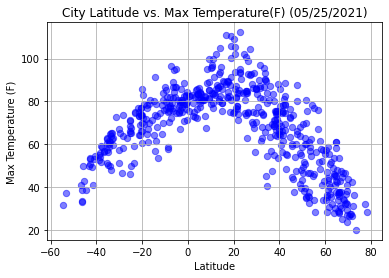

In [107]:
date = "05/25/2021"

x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Max Temperature"]
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature(F) ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

The above chart is showing the Max Temperature for a particular city relative to it's latitude.  As a cities geographic location is closer to the equator (i.e. latitude -20 to 20), climates become much warmer. Conversely, as a cities geopraphic location are farther away from the equater, city climates become much cooler.  The sample size is ~500 plus cities.

## Latitude vs. Humidity Plot

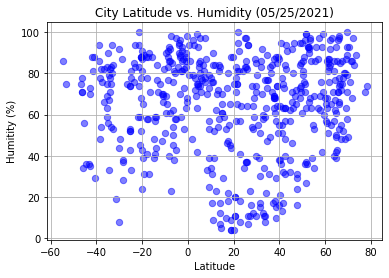

In [24]:
date = "05/25/2021"

x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Humidity"]
plt.xlabel('Latitude')
plt.ylabel('Humitity (%)')
plt.title(f"City Latitude vs. Humidity ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

The above chart is showing the Humidity percentage for a particular city relative to it's latitude. The sample size is ~500 plus cities.

## Latitude vs. Cloudiness Plot

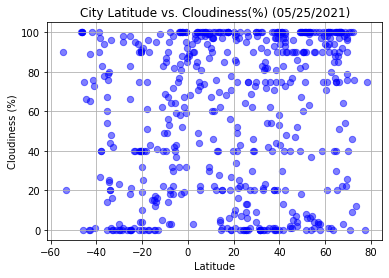

In [31]:
date = "05/25/2021"

x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Cloudiness"]
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness(%) ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

The above chart is showing the Cloudiness (%) for a particular city relative to it's latitude.  The sample size is ~500 plus cities.

## Latitude vs. Wind Speed Plot

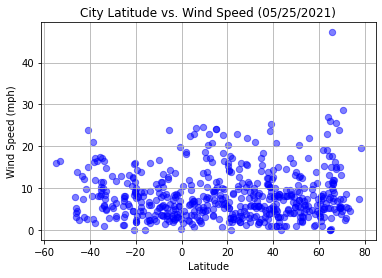

In [104]:
date = "05/25/2021"

x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Wind Speed"]
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

The above chart is showing Wind Speed for a particular city relative to it's latitude. The sample size is ~500 plus cities.  Note: There is one outlier for a windspeed of 47 mph for Tasiilaq, Greenland - wind speeds have been up to 60 mph as of 05/25/2021.  

In [83]:
# To establish new preliminary DataFrames for plotting data in the Northern and Southern Hemispheres

# Northern Hemisphere
northern_df = city_data_df_all.loc[city_data_df_all["City Latitude"] >= 0]
northern_df.reset_index(inplace=True)
x_axis_north_df_latitude = northern_df["City Latitude"]
y_axis_north_temp_df = northern_df["City Max Temperature"]
y_axis_north_humidity_df = northern_df["City Humidity"]
y_axis_north_cloudiness_df = northern_df["City Cloudiness"]
y_axis_north_windspeed_df = northern_df["City Wind Speed"]

# Southeren Hemisphere
southern_df = city_data_df_all.loc[city_data_df_all["City Latitude"] < 0]
southern_df.reset_index(inplace=True)
x_axis_south_df_latitude = southern_df["City Latitude"]
y_axis_south_temp_df = southern_df["City Max Temperature"]
y_axis_south_humidity_df = southern_df["City Humidity"]
y_axis_south_cloudiness_df = southern_df["City Cloudiness"]
y_axis_south_windspeed_df = southern_df["City Wind Speed"]

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8175995901006295


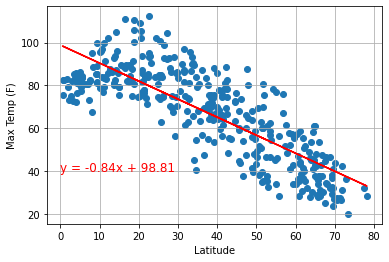

In [84]:
# scatter plot and linear regression   
plt.scatter(x_axis_north_df_latitude, y_axis_north_temp_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north_df_latitude, y_axis_north_temp_df)
regress_values = x_axis_north_df * slope + intercept
plt.plot(x_axis_north_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,40),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show() 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8261609469090446


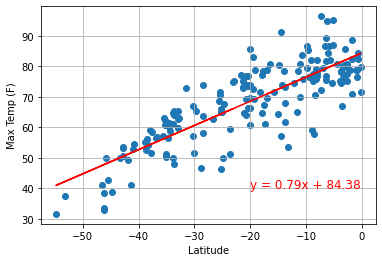

In [87]:
# scatter plot and linear regression   
plt.scatter(x_axis_south_df_latitude, y_axis_south_temp_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_df_latitude, y_axis_south_temp_df)
regress_values = x_axis_south_df_latitude * slope + intercept
plt.plot(x_axis_south_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,40),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show() 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1790892206009261


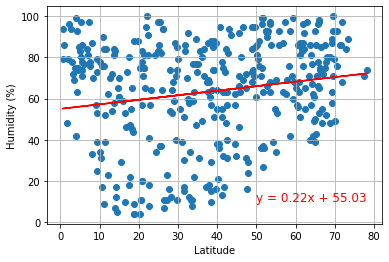

In [92]:
# scatter plot and linear regression   
plt.scatter(x_axis_north_df_latitude, y_axis_north_humidity_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north_df_latitude, y_axis_north_humidity_df)
regress_values = x_axis_north_df * slope + intercept
plt.plot(x_axis_north_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,10),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show() 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16770795669764324


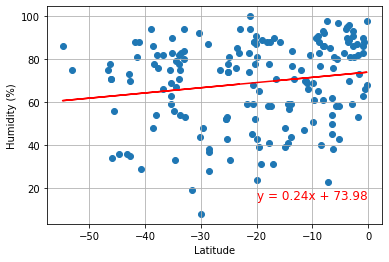

In [93]:
# scatter plot and linear regression   
plt.scatter(x_axis_south_df_latitude, y_axis_south_humidity_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_df_latitude, y_axis_south_humidity_df)
regress_values = x_axis_south_df_latitude * slope + intercept
plt.plot(x_axis_south_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,15),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show() 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05625186910038276


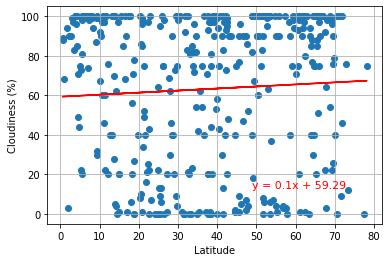

In [103]:
# scatter plot and linear regression   
plt.scatter(x_axis_north_df_latitude, y_axis_north_cloudiness_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north_df_latitude, y_axis_north_cloudiness_df)
regress_values = x_axis_north_df * slope + intercept
plt.plot(x_axis_north_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(49,13),fontsize=11,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09574147177047476


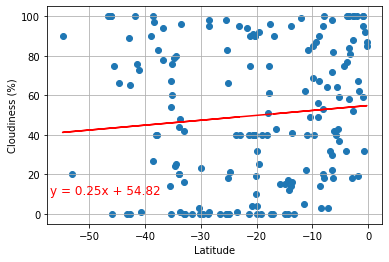

In [99]:
# scatter plot and linear regression   
plt.scatter(x_axis_south_df_latitude, y_axis_south_cloudiness_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_df_latitude, y_axis_south_cloudiness_df)
regress_values = x_axis_south_df_latitude * slope + intercept
plt.plot(x_axis_south_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-57,10),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00941560593710209


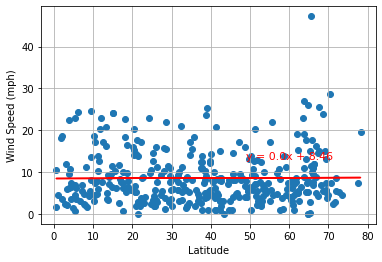

In [105]:
# scatter plot and linear regression   
plt.scatter(x_axis_north_df_latitude, y_axis_north_windspeed_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north_df_latitude, y_axis_north_windspeed_df)
regress_values = x_axis_north_df * slope + intercept
plt.plot(x_axis_north_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(49,13),fontsize=11,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2431146758934385


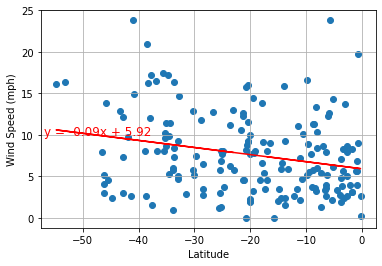

In [106]:
# scatter plot and linear regression   
plt.scatter(x_axis_south_df_latitude, y_axis_south_windspeed_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_df_latitude, y_axis_south_windspeed_df)
regress_values = x_axis_south_df_latitude * slope + intercept
plt.plot(x_axis_south_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-57,10),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show()